# Gradient Descent

In [29]:
import numpy as np
from numpy import inf
from numpy import linalg as LA
from sympy import *
import matplotlib.pyplot as plt
import numdifftools as nd
%matplotlib inline

## Part 1 - Implement Gradient Descent Algorithm

A continuación se presenta la implementación del algoritmo de gradiente descendiente:

In [30]:
def gradient_descent(tol, x0, a, f, Nmax):
    # Inputs
    # tol: tolerance of the algorithm, minimum value that must exist between x(k+1) and x(k) to stop iterating.
    # x0: initial condition, necessarily entered as a column vector.
    # a: alpha (magnitude of the steps)
    # f: function to which the algorithm is to be applied
    # Nmax: maximum number of iterations
    
    # k represents the current iteration.
    k = 0
    
    # dif is a parameter that will represent the distance between x(k+1) and x(k).
    dif = 1
    
    # If the function f is of dimension 2 or greater, the following code is applied:
    if isinstance(x0, (list, tuple, np.ndarray)):
        
        # A matrix is created where the current value of x(k) will be stored. The number of columns of A is the number
        # of variables of the vector x(k).
        A = np.zeros((1, np.shape(x0)[0]))
        
        # The first row of the matrix corresponds to the initial point.
        A[0, :] = x0.transpose()
        
        # The algorithm stops when the distance between x(k+1) and x(k) is less than the tolerance value entered by
        # parameter and when the maximum number of iterations has not yet been reached.
        while(k < Nmax and dif > tol):
            
            # The gradient of the function is calculated, evaluated at the current iteration. The result of this function is a
            # row vector that can be of any size greater than or equal to 2.
            gradient = nd.Gradient(f)(x0)
            
            # An auxiliary gradient is created but of column vector type, to be able to operate it with the initial condition.
            grad = np.zeros((np.size(gradient), 1))
            
            # The auxiliary gradient vector is filled with the values of the original gradient vector. This way,
            # the result of the gradient is already expressed as a column vector, as required to be able to
            # perform operations.
            for i in range(0, np.size(gradient)):
                grad[i] = gradient[i]
            
            # The formula of the gradient descent is applied.
            x = x0 - a * grad
            
            # x(k+1) is transposed to then be added to matrix A.
            xaux = x.transpose()
            A = np.append(A, xaux, axis=0)
            
            # The distance between x(k) and x(k+1) is calculated.
            dif = LA.norm(x - x0)
            
            # To move on to the next iteration.
            k += 1
            
            # The recently found value is assigned to the 'old' vector, as this is the one that should be used for the
            # next iteration.
            x0 = x
    
    # If the function f is of a single variable, the following code is applied:
    elif isinstance(x0, float) or isinstance(x0, int):
        
        # The algorithm stops when the distance between x(k+1) and x(k) is less than the tolerance value entered by
        # parameter and when the maximum number of iterations has not yet been reached.
        while(k < Nmax and dif > tol):
            
            # A matrix is created where the current value of x(k) will be stored.
            A = np.zeros((1, 1))
            
            # The value of the gradient is found.
            gradient = nd.Gradient(f)(x0)
            
            # The formula of the gradient descent is applied and the found value is added to matrix A.
            x = x0 - a * gradient
            A = np.append(A, x)
            
            # The distance between x(k) and x(k+1) is calculated.
            dif = LA.norm(x - x0)
            
            # To move on to the next iteration.
            k += 1
            
            # The recently found value is assigned to the 'old' vector, as this is the one that should be used for the 
            # next iteration.
            x0 = x
        
    # Outputs:
    # x: final result to which the algorithm converged when the stop condition was met, i.e., the minimum.
    # A: Matrix in which all the x(k) required to reach the minimum x are found.
        
    return x, A


## Part 2 - Trajectory of Gradient Descent

The gradient descent algorithm is applied to the function with different values of $\alpha$:

In [51]:
# Function definition
def f(x):
    Q = np.array([[1, 0], [0, 2]])
    B = np.array([[1/2], [0]])
    C = 5
    return (Q[0, 0]*x[0]**2 + (Q[0, 1] + Q[1, 0])*x[0]*x[1] + Q[1, 1]*x[1]**2 + B[0]*x[0] + B[1]*x[1] + C)[0]

# Definition of the different parameters needed by the algorithm
alpha = [0.1, 0.3, 0.8]
x0 = np.array([[2], [2]])
N = 100000
tol = 10**-6

# List to save the solutions found for each alpha
sols = []

# The algorithm is applied iteratively and the solution is added to the list
for a in alpha:
    xsol, solutions = gradient_descent(tol, x0, a, f, N)
    sols.append(xsol)
    
print(f'\nSolution with alpha = {alpha[0]}: \n {sols[0]}' )
print(f'\nSolution with alpha = {alpha[1]}: \n {sols[1]}' )
print(f'\nSolution with alpha = {alpha[2]}: \n {sols[2]}' )


Solution with alpha = 0.1: 
 [[-2.49996552e-01]
 [ 9.74508645e-14]]

Solution with alpha = 0.3: 
 [[-2.49999613e-01]
 [-2.62067225e-12]]

Solution with alpha = 0.8: 
 [[-2.49489061e-01]
 [-5.38687948e+15]]


As can be seen, for $\alpha = 0.1$ and $\alpha = 0.3$, the gradient descent algorithm converges to almost identical values. However, when using $\alpha = 0.8$, the algorithm diverges to a value far from the actual minimum value of the function.


In [52]:
# Applying the algorithm again for the first two values of alpha, which are the ones that converge, in order to use these
# results when plotting.
x1, sol1 = gradient_descent(tol, x0, alpha[0], f, N)
x2, sol2 = gradient_descent(tol, x0, alpha[1], f, N)

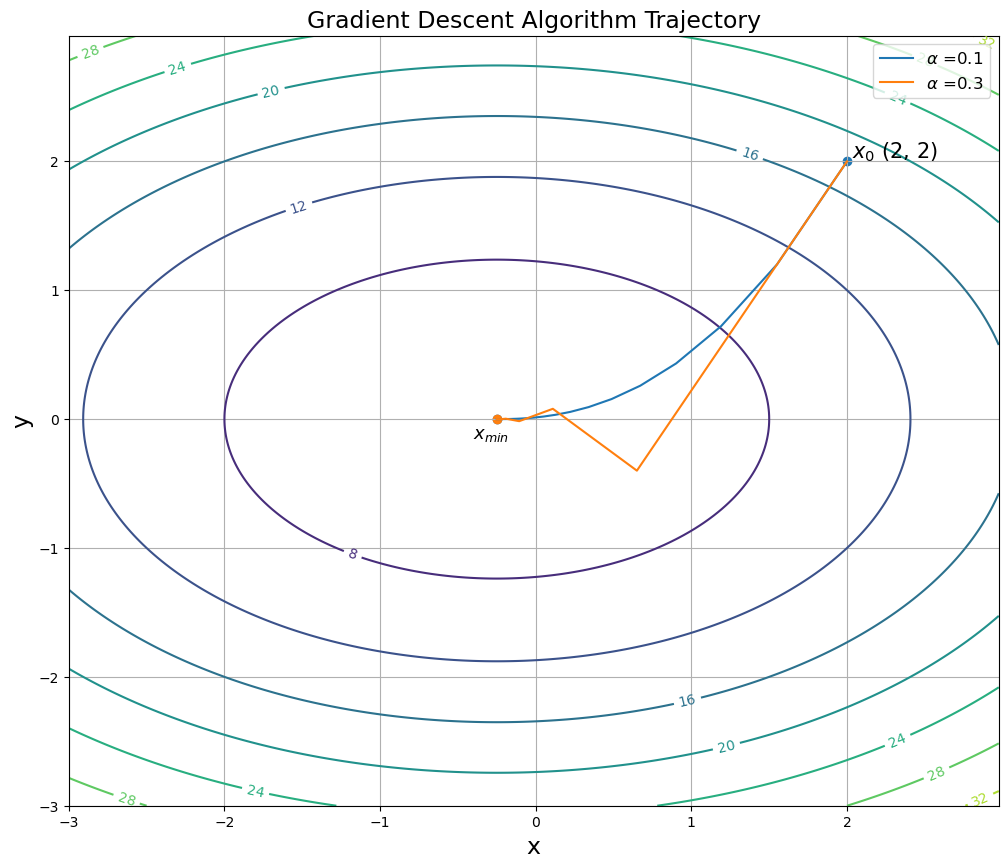

In [53]:
# Constructing the contour curves of the function f.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)

X, Y = np.meshgrid(x, y)
Z = X**2 + 2*Y**2 + (1/2)*X + 5

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Plotting the trajectories taken by the algorithm for each corresponding alpha.
plt.plot(sol1[:,0], sol1[:,1], label=r'$\alpha$ =' + f'{alpha[0]}')
plt.plot(sol2[:,0], sol2[:,1], label=r'$\alpha$ =' + f'{alpha[1]}')

plt.annotate("$x_0$ (2, 2)", x0+0.03, fontsize="15")
plt.annotate("$x_{min}$", x1-0.15, fontsize="13")

plt.scatter([x0[0], x1[0]], [x0[1], x1[1]])
plt.scatter(x2[0], x2[1])
plt.legend(fontsize="12")

ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Gradient Descent Algorithm Trajectory', fontsize="17")
ax.grid()
plt.show()


In the above graph, the trajectory for $\alpha = 0.8$ is not plotted because the final value obtained for this $\alpha$ is very large compared to the other two, and it would not allow the other results to be clearly observed.

It can be concluded that, as the value of the parameter $\alpha$ increases, the algorithm becomes more prone to divergence because larger steps are taken through the function, which may return values of $f(x_{min})$ that are greater than the previous value of $x_{min}$.

## Part 3 - Gradient Descent on $\gamma$ function

In [34]:
# Se define la función
def gamma(x):
    return (3*(1-x[0])**2)*np.exp(-x[0]**2-(x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5)*np.exp(-x[0]**2-x[1]**2) - (1/3)*np.exp(-(x[0]+1)**2-x[1]**2)

### a)
Se aplica el algoritmo de gradiente descendiente para diferentes puntos iniciales:

In [35]:
# Se declaran los parámetros para ingresar al algoritmo.
tol = 10**-6
a=0.01
Nmax = 10000

# Se declaran todos los puntos iniciales como vectores columna (pues así lo requiere el algoritmo)
x01 = np.array([[1.7],[-0.5]])
x02 = np.array([[-0.5],[-1.2]])
x03 = np.array([[-2],[-1]])
x04 = np.array([[1],[2]])
x05 = np.array([[2],[1]])

# Se ponen todos los puntos iniciales en una lista.
puntos_iniciales = [x01, x02, x03, x04, x05]

# Se crea una lista vacía en donde se guardarán las soluciones para la función.
sols2 = []

# Se aplica el algoritmo para cada punto inicial
for x in puntos_iniciales:
    xsol2, soluciones2 = gradient_descent(tol, x, a, gamma, Nmax)
    sols2.append(xsol2)

for i in range(0,len(puntos_iniciales)):
    print(f'\nSolución con \n x0 = \n {puntos_iniciales[i]}: \n \n {sols2[i]}')


Solución con 
 x0 = 
 [[ 1.7]
 [-0.5]]: 
 
 [[ 3.50543959]
 [-1.48108127]]

Solución con 
 x0 = 
 [[-0.5]
 [-1.2]]: 
 
 [[ 0.22827481]
 [-1.62553638]]

Solución con 
 x0 = 
 [[-2]
 [-1]]: 
 
 [[-1.34739965]
 [ 0.20450967]]

Solución con 
 x0 = 
 [[1]
 [2]]: 
 
 [[2.33655707]
 [3.36736098]]

Solución con 
 x0 = 
 [[2]
 [1]]: 
 
 [[3.43806788]
 [1.65447625]]


In [36]:
# Se aplica el algoritmo para los distintos puntos iniciales
xmin1, A1 = gradient_descent(tol, x01, a, gamma, Nmax)
xmin2, A2 = gradient_descent(tol, x02, a, gamma, Nmax)
xmin3, A3 = gradient_descent(tol, x03, a, gamma, Nmax)
xmin4, A4 = gradient_descent(tol, x04, a, gamma, Nmax)
xmin5, A5 = gradient_descent(tol, x05, a, gamma, Nmax)

Con $x_{01} = (1.7, -0.5)$

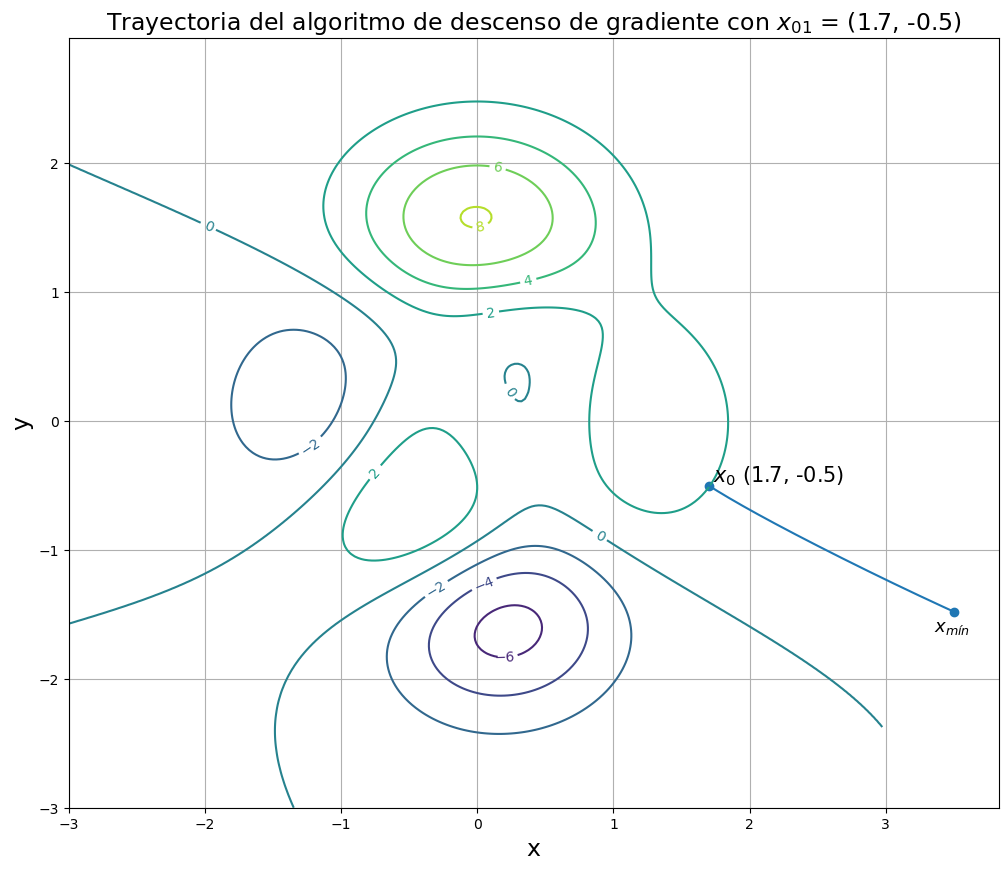

In [37]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A1[:,0], A1[:,1], label = r'$x_0$ =' + "(1.7, -0.5)")

plt.annotate("$x_0$ (1.7, -0.5)", x01+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin1-0.15, fontsize="13")

plt.scatter([x01[0], xmin1[0]], [x01[1], xmin1[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente con $x_{01}$ = (1.7, -0.5)', fontsize="17")
ax.grid()
plt.show()

Con $x_{02} = (-0.5, -1.2)$:

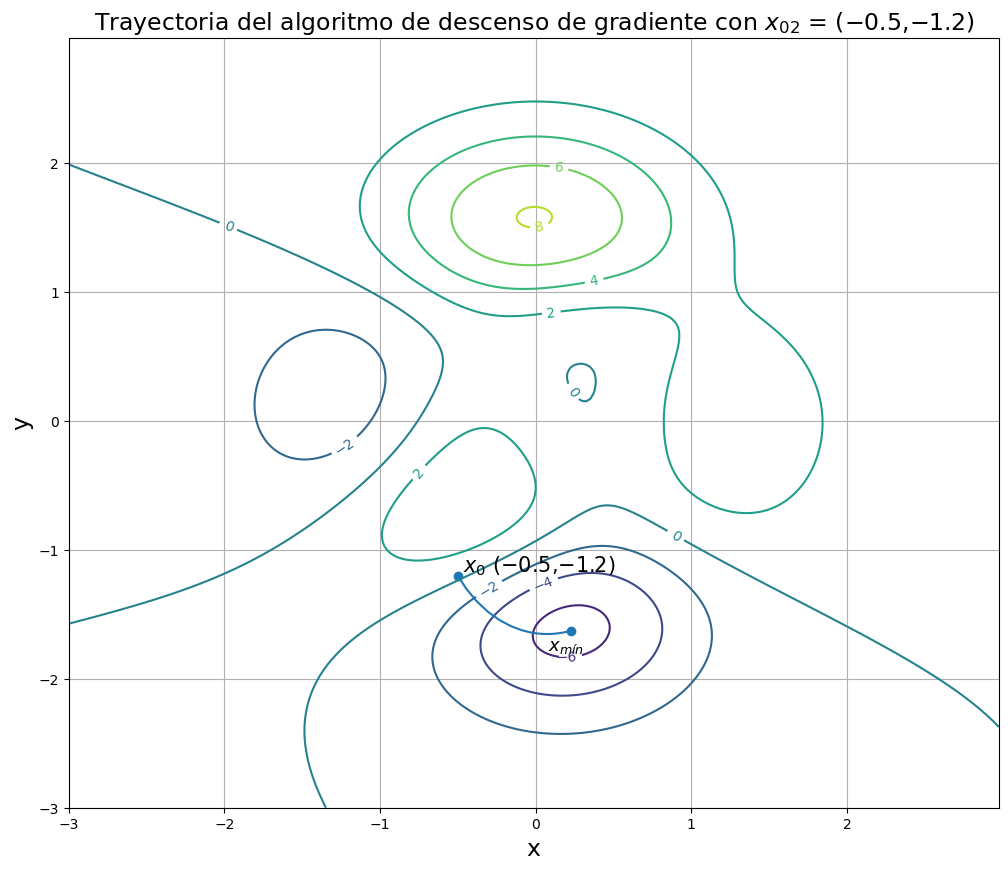

In [38]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A2[:,0], A2[:,1], label = r'$x_0$ =' + "(−0.5,−1.2)")

plt.annotate("$x_0$ (−0.5,−1.2)", x02+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin2-0.15, fontsize="13")

plt.scatter([x02[0], xmin2[0]], [x02[1], xmin2[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente con $x_{02}$ = (−0.5,−1.2)', fontsize="17")
ax.grid()
plt.show()

Con $x_{03} = (-2, -1)$:

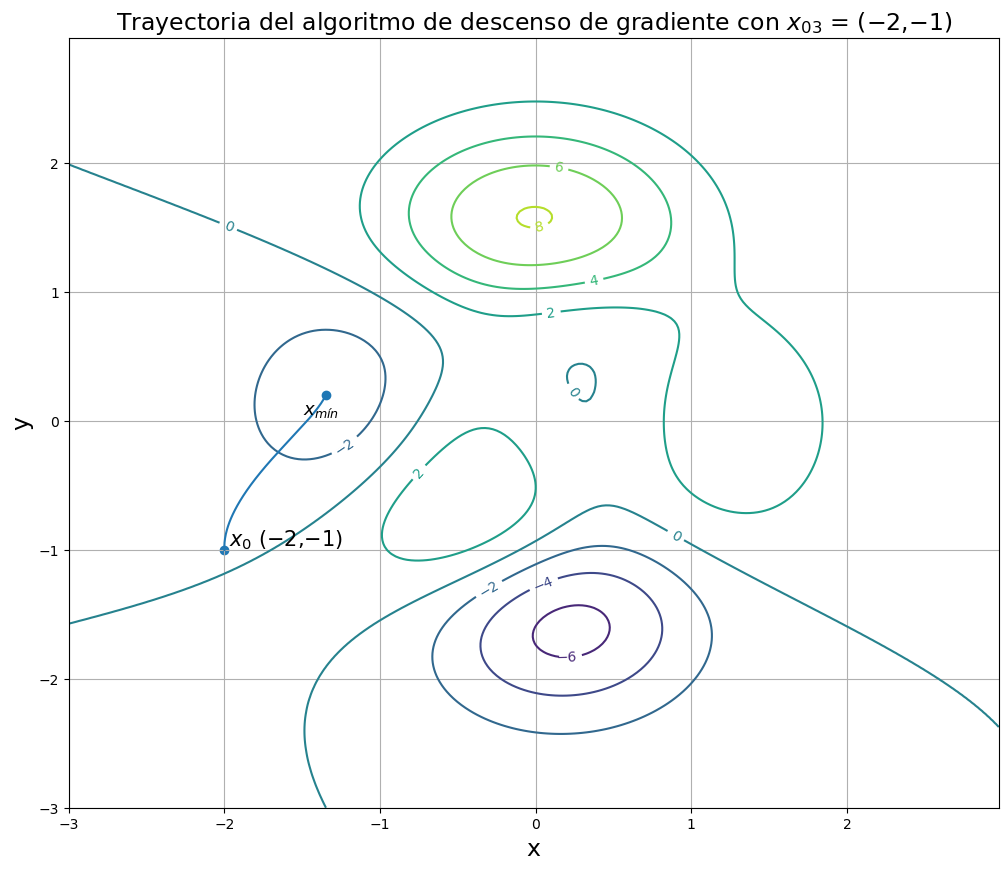

In [39]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A3[:,0], A3[:,1], label = r'$x_0$ =' + "(−2,−1)")

plt.annotate("$x_0$ (−2,−1) ", x03+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin3-0.15, fontsize="13")

plt.scatter([x03[0], xmin3[0]], [x03[1], xmin3[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente con $x_{03}$ = (−2,−1)', fontsize="17")
ax.grid()
plt.show()

Con $x_{04} =  (1 , 2)$:

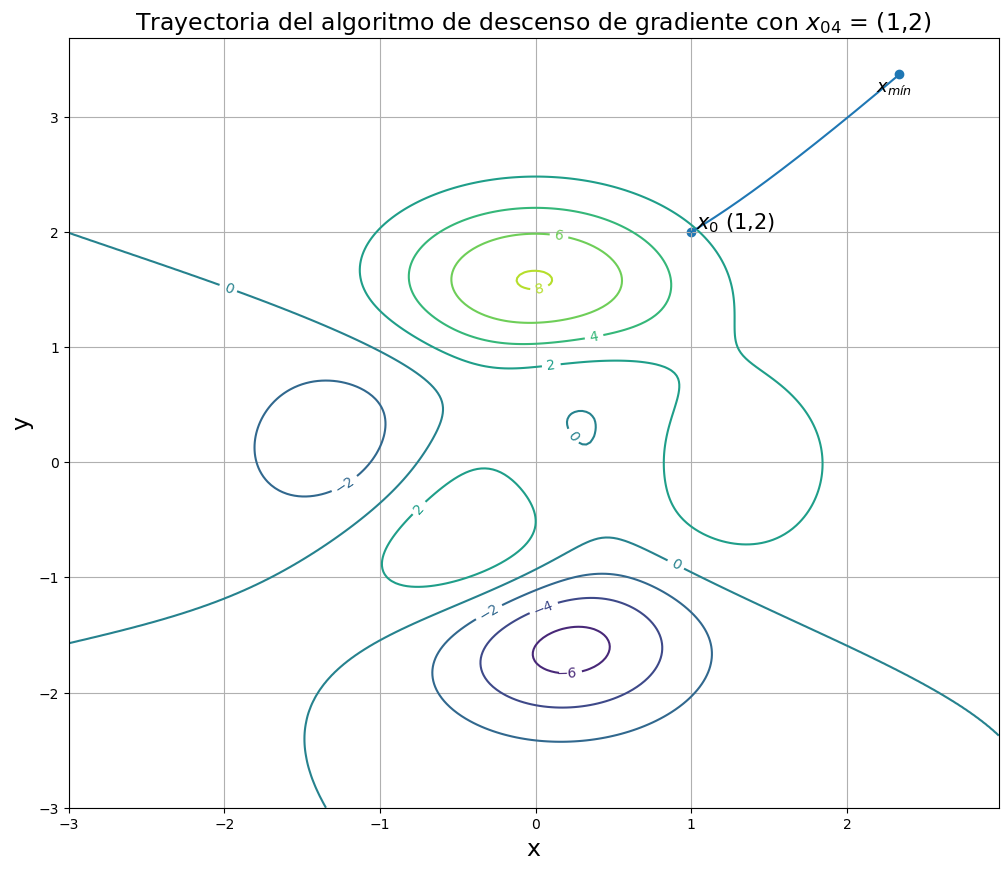

In [40]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A4[:,0], A4[:,1], label = r'$x_0$ =' + "(1,2)")

plt.annotate("$x_0$ (1,2)", x04+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin4-0.15, fontsize="13")

plt.scatter([x04[0], xmin4[0]], [x04[1], xmin4[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente con $x_{04}$ = (1,2)', fontsize="17")
ax.grid()
plt.show()

Con $x_{05} =  (2 , 1)$:

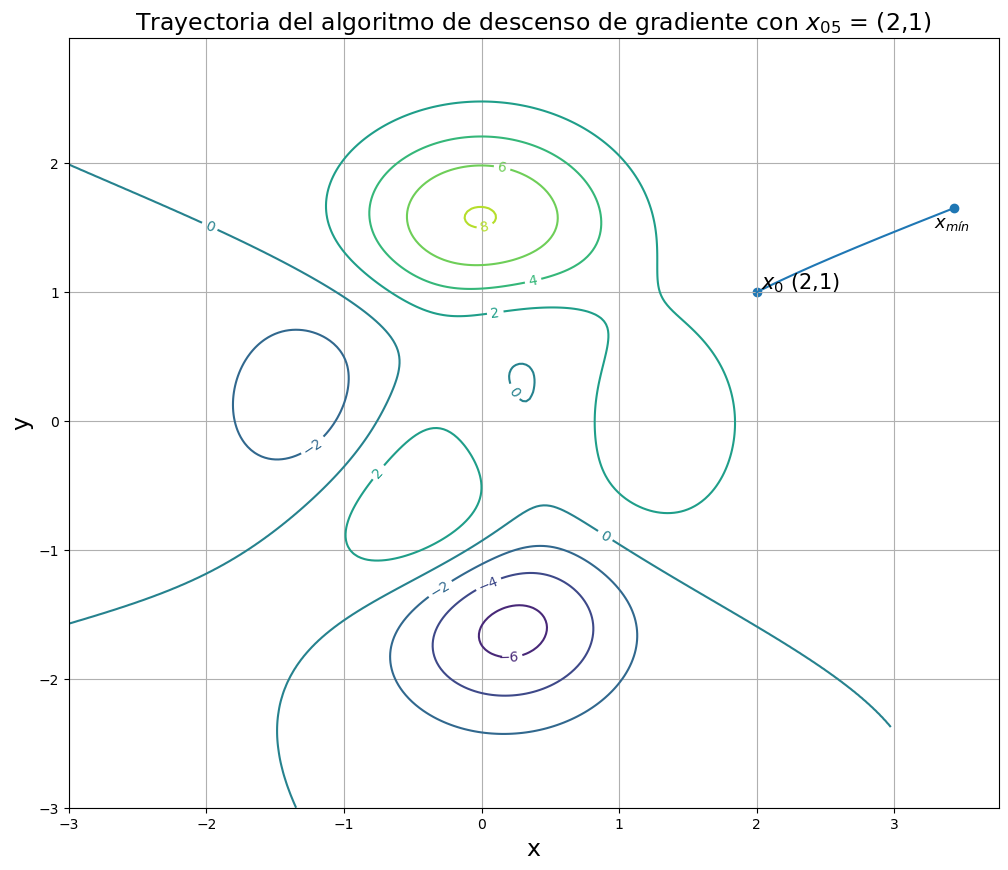

In [41]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A5[:,0], A5[:,1], label = r'$x_0$ =' + "(2,1)")

plt.annotate("$x_0$ (2,1)", x05+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin5-0.15, fontsize="13")

plt.scatter([x05[0], xmin5[0]], [x05[1], xmin5[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente con $x_{05}$ = (2,1)', fontsize="17")
ax.grid()
plt.show()

### b)

Gradiente aproximado

In [42]:
def descenso_grad_aprox(tol, x0, a, f, Nmax):
    # Entradas
    # tol: tolerancia del algoritmo, valor mínimo que debe haber de distancia entre x(k+1) y x(k) para parar de iterar.
    # x0: condición incial, necesariamente ingresada como un vector columna.
    # a: alpha (magnitud de los saltos)
    # f: función a la que se le quiere aplicar el algoritmo
    # Nmax: número máximo de iteraciones
    
    # Aproximación para calcular el gradiente.
    h = 0.01
    
    # k representa la iteración actual.
    k = 0
    
    # dif es un parámetro que representará la distancia entre x(k+1) y x(k).
    dif = 1
    
    # Si la función f es de dimensión 2 o mayor, se aplica el siguiente código:
    if isinstance(x0, (list, tuple, np.ndarray)):
        
        # Se define cada vector 'di' en una matriz.
        d = h*np.identity(np.shape(x0)[0])
        
        # Se crea una matriz en donde se irá guardando el valor actual de x(k). El número de columnas de A es el número
        # de variables del vector x(k).
        A = np.zeros((1,np.shape(x0)[0]))
        
        # La primera fila de la matriz corresponde al punto inicial.
        A[0,:] = x0.transpose()
        
        # El algoritmo se detiene cuando la distancia entre x(k+1) y x(k) es menor al valor de tolerancia que entra por
        # parámetro y cuando todavía no se ha alcanzado el número máximo de iteraciones.
        while(k < Nmax and dif > tol):
            
            # Se calcula el gradiente de la función, evaluado en la iteración actual. Se empieza por crear el vector
            # del gradiente
            gradiente = np.zeros((1, np.shape(x0)[0]))
            grad = np.zeros((np.shape(x0)[0],1))

            for i in range(0, np.shape(gradiente)[1]):
                # Se convierte en vector columna.
                grad[i] = gradiente[:,i]
                # Se convierte la i-ésima fila de la matriz d en un vector columna también, para poderlos operar.
                dcol = np.reshape(d[i], (-1, 1))
                # Se calcula el gradiente teniendo en cuenta la aproximación.
                grad[i] = (f(x0 + dcol) - f(x0))/h
            
            # Se aplica la fórmula del gradiente descendiente.
            x = x0 - a*grad
            
            # Se transpone el x(k+1) para luego agregarlo a la matriz A.
            xaux = x.transpose()
            A = np.append(A, xaux, axis=0)
            
            # Se calcula la distancia entre x(k) y x(k+1)
            dif = LA.norm(x-x0)
            
            # Para avanzar a la siguiente iteración.
            k+=1
            
            # Se asigna al vector 'viejo', el valor recientemente encontrado, peus este es el que se debe usar para la 
            # siguiente iteración.
            x0 = x
    
    # Si la función f es de una sola variable, se aplica el siguiente código:
    elif isinstance(x0, float) or isinstance(x0, int):
        
        # El algoritmo se detiene cuando la distancia entre x(k+1) y x(k) es menor al valor de tolerancia que entra por
        # parámetro y cuando todavía no se ha alcanzado el número máximo de iteraciones.
        while(k < Nmax and dif > tol):
            
            # Se crea una matriz en donde se irá guardando el valor actual de x(k).
            A = np.zeros((1,1))
            
            # Se encuentra el valor del gradiente usando la aproximación, sabiendo que en este caso, d = h.
            gradiente = (f(x0+h) - f(x0))/h
            
            # Se aplica la fórmula del gradiente descendiente y se agrega el valor encontrado a la matriz A.
            x = x0 - a*gradiente
            A = np.append(A, x)
            
            # Se calcula la distancia entre x(k) y x(k+1)
            dif = LA.norm(x-x0)
            
            # Para avanzar a la siguiente iteración.
            k+=1
            
            # Se asigna al vector 'viejo', el valor recientemente encontrado, peus este es el que se debe usar para la 
            # siguiente iteración.
            x0 = x
        
    # Salidas:
    # x: resultado final al que el algoritmo convergió cuando se cumplió la condición de parada, es decir, el mínimo.
    # A: Matriz en la que se encuentran todos los x(k) requeridos para llegar al x mínimo.
        
    return x, A

Se procede a aplicar el algoritmo con el cálculo aproximado del gradiente a los mismos puntos iniciales del punto 3.

In [43]:
# Parámetros
a = 0.01
tol = 10**-6
Nmax = 10000

# Se aplica el algoritmo para los distintos puntos iniciales
xmin_aprox1, A1_aprox = descenso_grad_aprox(tol, x01, a, gamma, Nmax)
xmin_aprox2, A2_aprox = descenso_grad_aprox(tol, x02, a, gamma, Nmax)
xmin_aprox3, A3_aprox = descenso_grad_aprox(tol, x03, a, gamma, Nmax)
xmin_aprox4, A4_aprox = descenso_grad_aprox(tol, x04, a, gamma, Nmax)
xmin_aprox5, A5_aprox = descenso_grad_aprox(tol, x05, a, gamma, Nmax)

Con $x_{01} = (1.7, -0.5)$

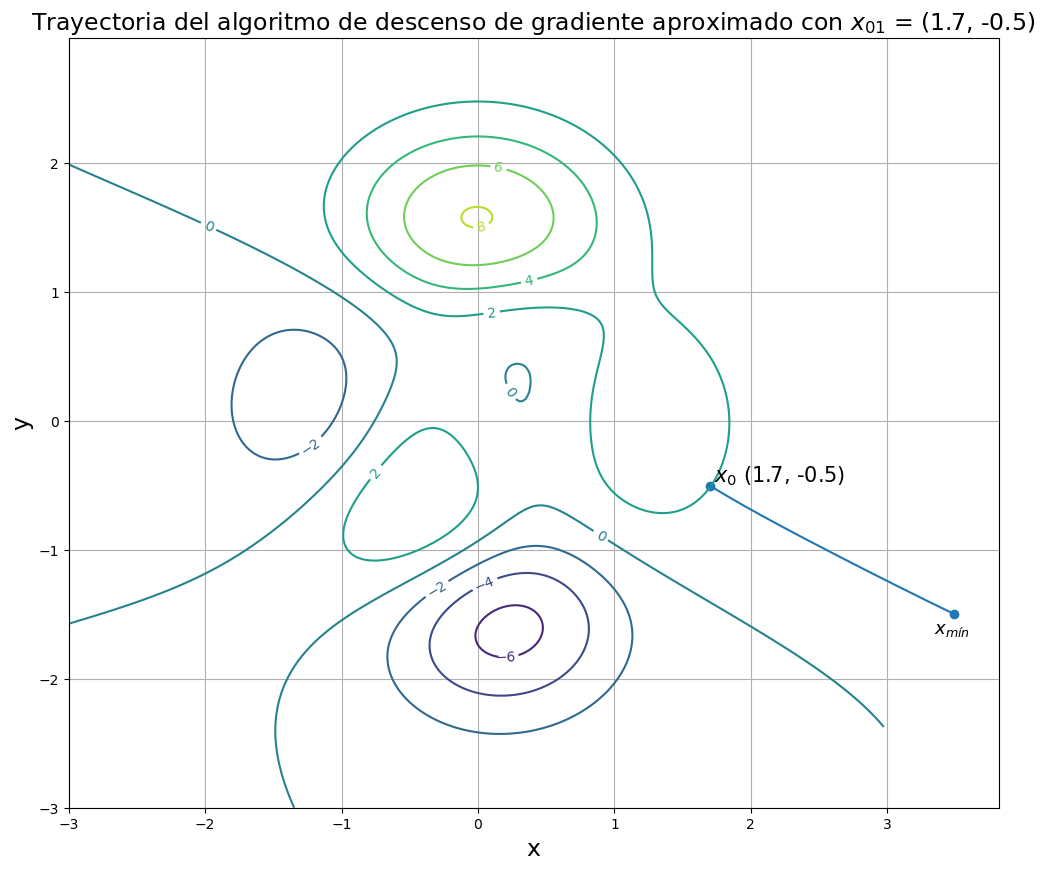

In [44]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A1_aprox[:,0], A1_aprox[:,1], label = r'$x_0$ =' + "(1.7, -0.5)")

plt.annotate("$x_0$ (1.7, -0.5)", x01+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin_aprox1-0.15, fontsize="13")

plt.scatter([x01[0], xmin_aprox1[0]], [x01[1], xmin_aprox1[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente aproximado con $x_{01}$ = (1.7, -0.5)', fontsize="17")
ax.grid()
plt.show()

Con $x_{02} = (-0.5, -1.2)$

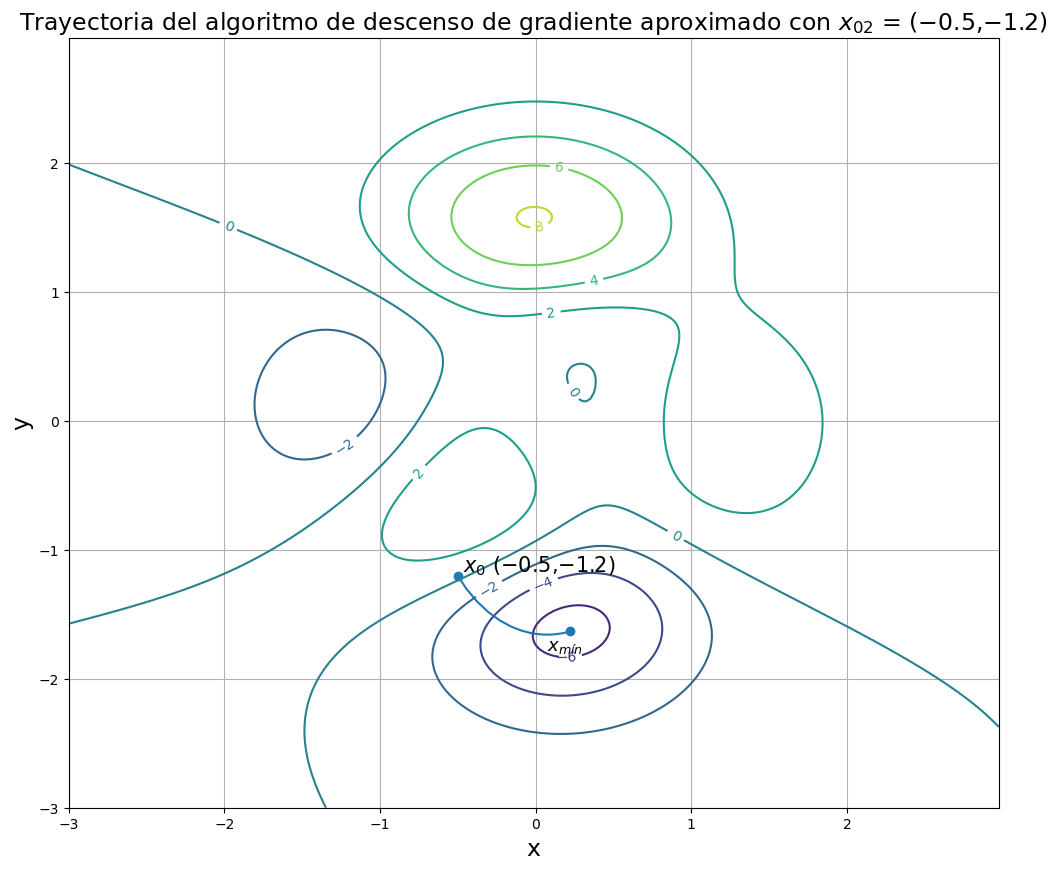

In [45]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A2_aprox[:,0], A2_aprox[:,1], label = r'$x_0$ =' + "(−0.5,−1.2)")

plt.annotate("$x_0$ (−0.5,−1.2)", x02+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin_aprox2-0.15, fontsize="13")

plt.scatter([x02[0], xmin_aprox2[0]], [x02[1], xmin_aprox2[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente aproximado con $x_{02}$ = (−0.5,−1.2)', fontsize="17")
ax.grid()
plt.show()

Con $x_{03} = (-2 , -1)$

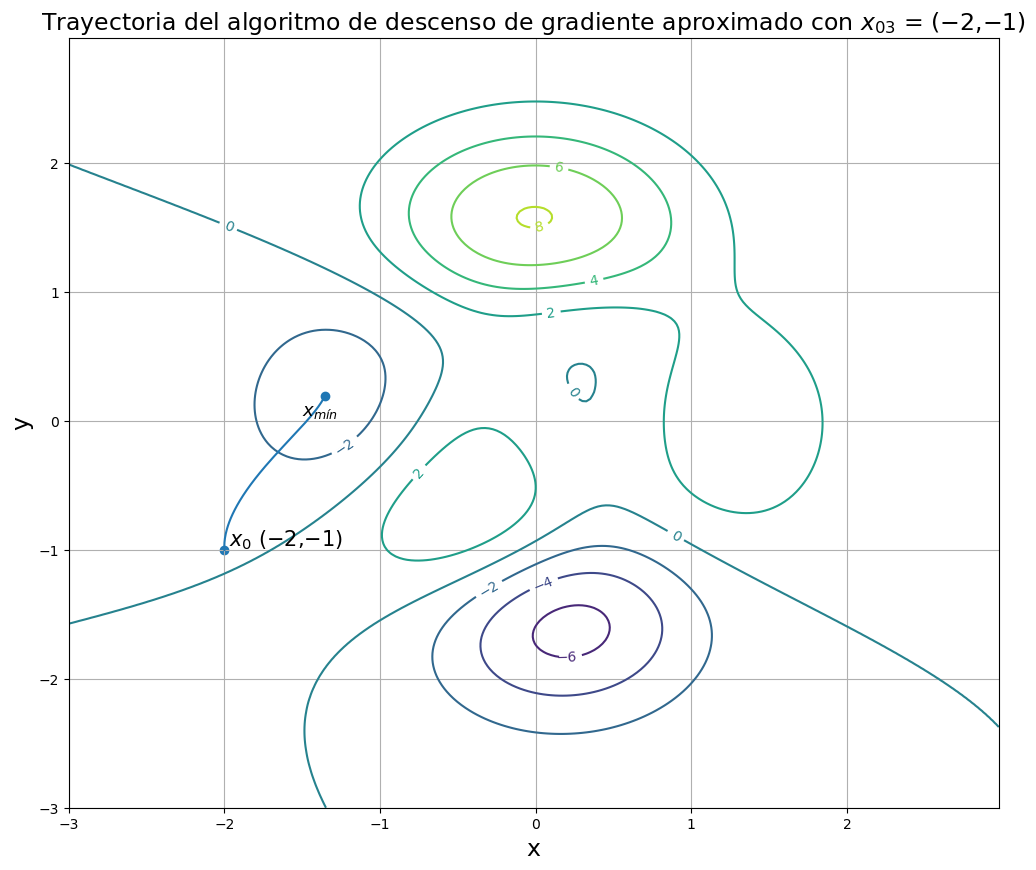

In [46]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A3_aprox[:,0], A3_aprox[:,1], label = r'$x_0$ =' + "(−2,−1)")

plt.annotate("$x_0$ (−2,−1)", x03+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin_aprox3-0.15, fontsize="13")

plt.scatter([x03[0], xmin_aprox3[0]], [x03[1], xmin_aprox3[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente aproximado con $x_{03}$ = (−2,−1)', fontsize="17")
ax.grid()
plt.show()

Con $x_{04} = (1 , 2)$

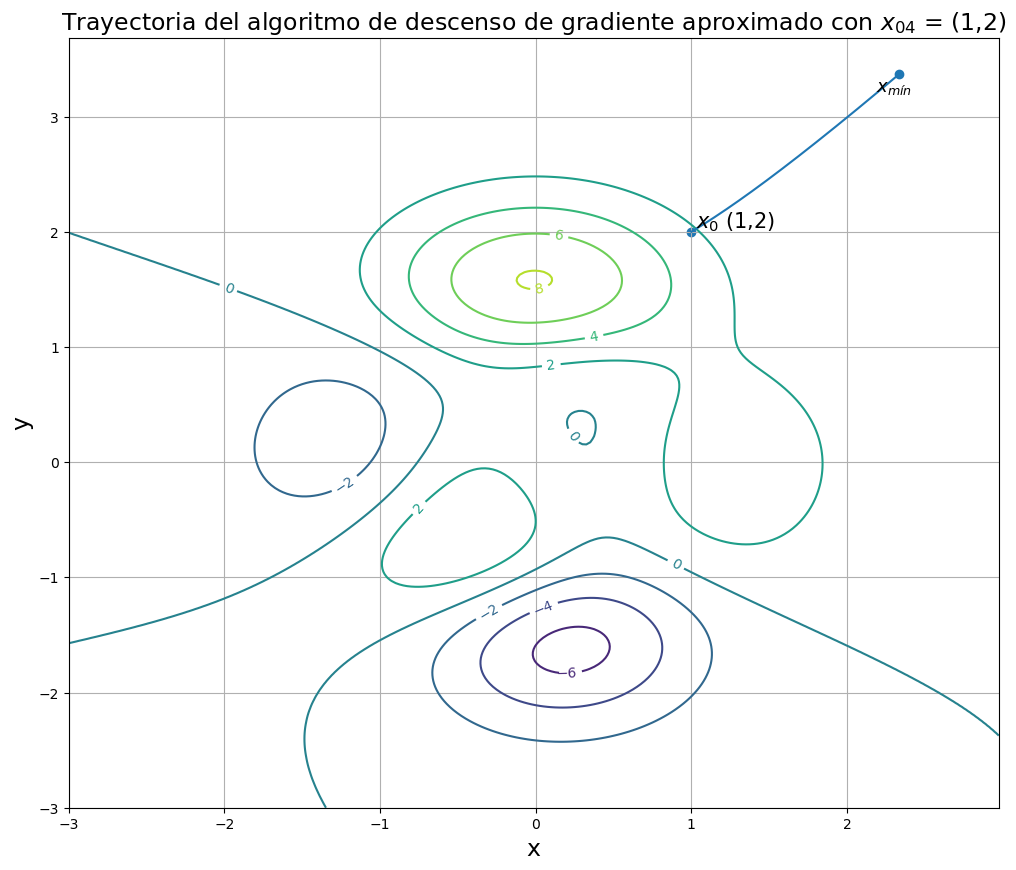

In [47]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A4_aprox[:,0], A4_aprox[:,1], label = r'$x_0$ =' + "(1,2)")

plt.annotate("$x_0$ (1,2)", x04+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin_aprox4-0.15, fontsize="13")

plt.scatter([x04[0], xmin_aprox4[0]], [x04[1], xmin_aprox4[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente aproximado con $x_{04}$ = (1,2)', fontsize="17")
ax.grid()
plt.show()

Con $x_{05} =  (2 , 1)$

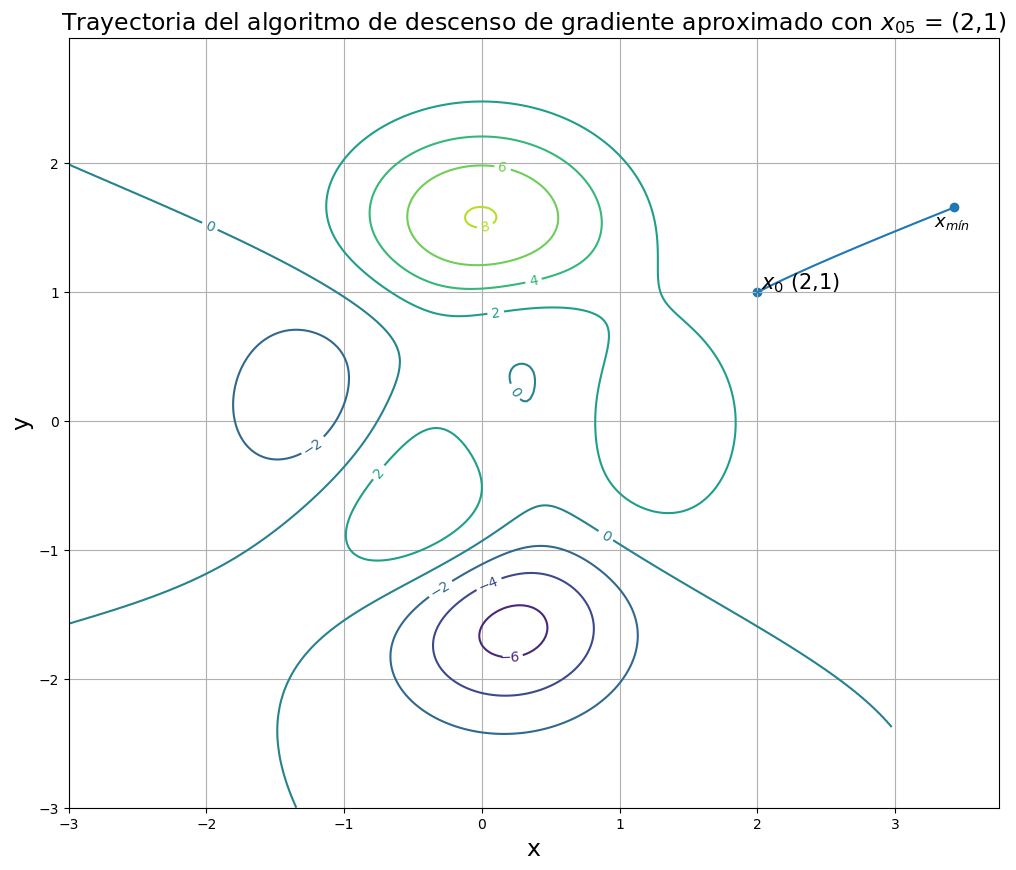

In [48]:
# Se construyen las curvas de contorno de la función gamma.
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Se grafica la trayectoria tomada por el algoritmo para el punto inicial correspondiente.
plt.plot(A5_aprox[:,0], A5_aprox[:,1], label = r'$x_0$ =' + "(2,1)")

plt.annotate("$x_0$ (2,1)", x05+0.03, fontsize="15")
plt.annotate("$x_{mín}$", xmin_aprox5-0.15, fontsize="13")

plt.scatter([x05[0], xmin_aprox5[0]], [x05[1], xmin_aprox5[1]])


ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trayectoria del algoritmo de descenso de gradiente aproximado con $x_{05}$ = (2,1)', fontsize="17")
ax.grid()


plt.show()

Como se puede notar, los resultados usando el método con el cálculo del gradiente aproximado son muy cercanos a los resultados usando el método con el cálculo exacto del gradiente.

### c)

El punto inicial influye en la convergencia del método de gradiente descendiente pues no todos los puntos iniciales están cerca de un mínimo de la función objetivo. Esto quiere decir que si se elige un punto inicial muy lejano de un mínimo local de la función, el algoritmo puede dar saltos que se alejen del mínimo local real.

Si se elige un punto inicial cercano a un mínimo local, el algoritmo va a converger a este punto, pues todos los saltos posibles van a estar en la dirección de este mínimo. Sin embargo, si se elige un punto inicial muy alejado de un mínimo local, el algoritmo va a diverger porque un salto lo puede dar para una dirección en la iteración $i$ pero en la siguiente, el salto lo puede dar en una dirección completamente distinta, y si se sigue así no se llegará nunca a un mínimo local de la función.

## Part 4 - Convergence

Se define la región $D \subseteq \mathbb{R}^2$ como

$D = \{x = [x_1, x_2]^T \in \mathbb{R}^2 | -6.531 \leq \gamma(x_1, x_2) \leq -2 \}$

Para un $\alpha$ constante igual 0.01, se puede afirmar que existe la región cumple que todo $x_0 \in D$ garantiza la convergencia del algoritmo de descenso de gradiente al mínimo global de la función $\gamma$ porque en esta región, la función $\gamma$ es convexa y en cualquier punto de esta región, el gradiente va a estar apuntando hacia afuera, lo que significa que el algoritmo de descenso de gradiente siempre va a llevar a la función en sentido contrario, hasta eventualmente llegar al mínimo global de la función, en donde esta tiene un valor de $\gamma(x,y) = -6.531$, como se demustra en la celda siguiente:

In [49]:
gamma(np.array([[0.2],[-1.6]]))

array([-6.53100742])

A continuación se muestra una gráfica en 2 dimsensiones de la región $D$. En general, todos los puntos que están dentro de la región $D$ son los que se encuentran dentro de la curva de nivel $\gamma(x,y) = 2$, y estaría limitado hasta la curva de nivel $\gamma(x,y) = -6.531$, que es donde se encuentra el mínimo global de la función.

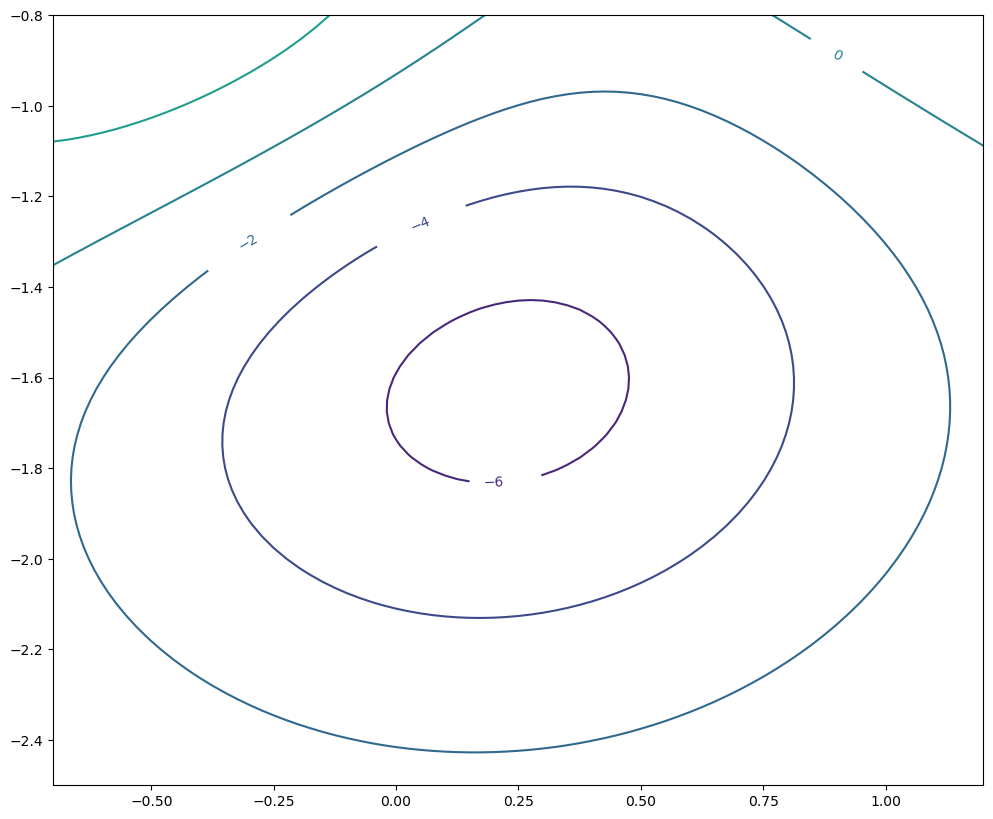

In [50]:
step = 0.025
x = np.arange(-3, 3, step)
y = np.arange(-3, 3, step)
    
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

plt.xlim(-0.7, 1.2)
plt.ylim(-2.5, -0.8)
plt.show()